# Data Science - IBM Coursera Capstone Project 

#### Author Name: Hue Dinh - Data Science Student

# Car Accident Severity Analysis and Prediction with Logistic Regression

### 1. Introduction

#### Background:
Cars accident is a crucial problem for all countries in the world. It annually makes over 26.000 people die or seriously injured in Great Britain alone (reported in 2018). It indeed brings along numerous social and personal consequences. 

Car accidents casualties are various, controllable and uncontrollable. Therefore, an accurate analysis prediction model is necessary to help drivers and lawmakers to have awareness in particular situations so that severity will be minimised.

This project will focus on analysing accident data - The record of car accidents in the UK from 2005 to 2015, which include contributing factors to severity.

#### Problem

The data might includes bias information which is a part of natural society development. This project will build a model for predicting the severity of car accidents in particular conditions, which can be aware of. 

#### Interest

Local governments, especially police force will work much more effective if they know how severe a day can be. Appropriate actions will be taken, workforce will be more productive. Moreover, the application can be developed to send driver appropriate alerts on a day which is dangerous for driving so that they can consider to take public transport instead.

#### About the Dataset 


Data set will be used in this analysis are Accidents and Vehicle from Road Safety Data, provided by UK government. 
They can be found __[HERE](https://www.kaggle.com/silicon99/dft-accident-data)__ and fully explained __[HERE](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data)__ . They recored accidents and vehicles in those accidents, including acidental scenes, conditions at site, vehicle details, etc... 


### 2. Data acquisition

In [1]:
# Importing neccessary libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder, KBinsDiscretizer, MaxAbsScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns
sns.set()
import math

%matplotlib inline

In [2]:
#Loading Data
accident = pd.read_csv('/Users/huedinh/Desktop/Accidents0515.csv', index_col='Accident_Index')
vehicle = pd.read_csv(r'/Users/huedinh/Desktop/Vehicles0515.csv', index_col='Accident_Index', error_bad_lines=False)

# Merging two data sets into one with inner join by index
df = pd.merge(vehicle, accident, how = 'inner', on = 'Accident_Index')
print(df.shape)
df.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(3004425, 52)


,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,1,9,0,18,0,0,0,0,0,0,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,1,11,0,4,0,3,0,0,0,0,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,1,11,0,17,0,0,0,4,0,0,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00003,2,9,0,2,0,0,0,0,0,0,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,1,9,0,18,0,0,0,0,0,0,...,0,0,1,1,1,0,0,1,1,E01002840


### 2.1 About the dataset
Vehicle_type has 20 different attributes, however car (number 9), has the significant frequency. Since other vehicles have different set of contributing factors to the severity, and to make the model to be more more accurate, we will focus on only car accident. 

Each observation in the dataset is the record of one vehicle in an accident. Each accident may contain more than one vehicle, so the picture from the dataset, how each factor attribute to the severity is more clear. 

The dataset is represent by Label-Encoding, which represent each category in each variable as a number. All missing values are represented by -1. As this is a large dataset, so it allows us to drop all missing values for analysis. 

This dataset is contributed mostly by categorical variables, which is easy to be understood, as the record of accidents are based on check-list from the police. 

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


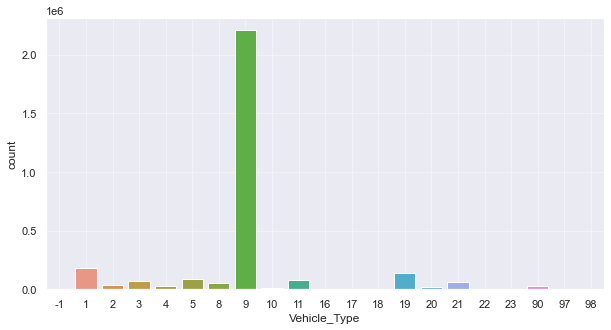

In [3]:
plt.figure(figsize=(10, 5))
ax=sns.countplot('Vehicle_Type',data=df)
plt.grid(alpha=0.4)

##### There are many vehicle types are recorded. To make the analysis more concentrated, and avoid over fitting the model, we will focus on the most variaty vehicle - car, which is labelled 9 in the variable Vehicle_Type. 

In [6]:
df = df[df.Vehicle_Type==9]
df.shape

(2205201, 52)

The original dataset has 3 millions observations, after filter Vehicle type to car only, the new dataset has 2,2 millions observations, relatively large. 

### 2.2. Identifing highly bias variables 

#### These factors seem to have considerable participation in causing accidents. However, they are simply the nature result of the society development. Such as people at the age of 30s and 40s are more likely to own and to use a car then the rest, urban areas are more density than rural areas, so more people drive, more accidents occur. Therefore, we do not use these variables. 

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


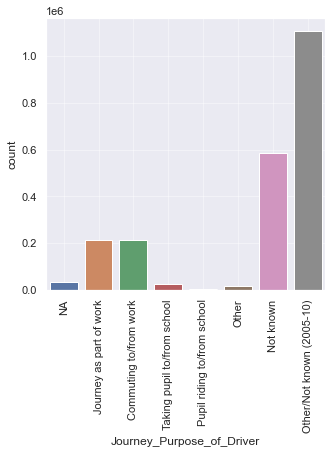

In [42]:
#Journey_Purpose_of_Driver
plt.figure(figsize=(5, 5))
ax=sns.countplot('Journey_Purpose_of_Driver',data=df)
ax.set_xticklabels(['NA','Journey as part of work','Commuting to/from work','Taking pupil to/from school', 'Pupil riding to/from school',
                   'Other', 'Not known', 'Other/Not known (2005-10)'])
plt.xticks(rotation=90)
plt.grid(alpha=0.4)

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


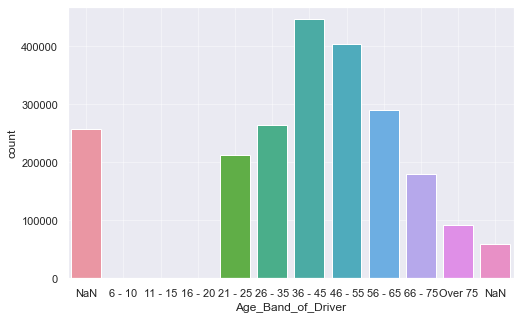

In [46]:
#Age_Band_of_Driver
plt.figure(figsize=(8, 5))
bx=sns.countplot('Age_Band_of_Driver',data=df)
bx.set_xticklabels(['NaN', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 35', 
                                                              '36 - 45','46 - 55', '56 - 65', '66 - 75', 'Over 75', 'NaN'])

plt.grid(alpha=0.4)                   

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


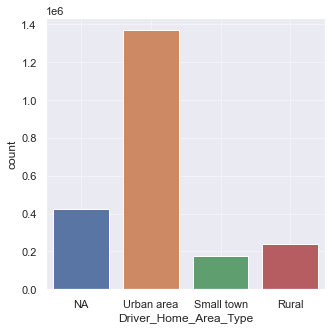

In [48]:
#Driver_Home_Area_Type
plt.figure(figsize=(5, 5))
cx=sns.countplot('Driver_Home_Area_Type',data=df)
cx.set_xticklabels(['NA','Urban area', 'Small town', 'Rural'])
plt.grid(alpha=0.4)  

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


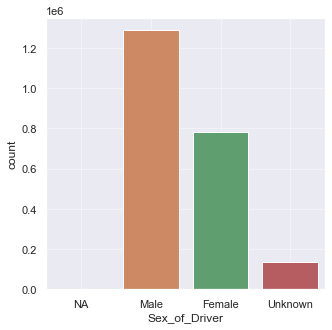

In [50]:
#Driver_Home_Area_Type
plt.figure(figsize=(5, 5))
dx=sns.countplot('Sex_of_Driver',data=df)
dx.set_xticklabels(['NA','Male', 'Female', 'Unknown'])
plt.grid(alpha=0.4) 

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


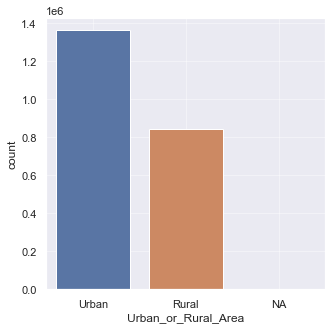

In [52]:
#Urban_or_Rural_Are
plt.figure(figsize=(5, 5))
ex=sns.countplot('Urban_or_Rural_Area',data=df)
ex.set_xticklabels(['Urban', 'Rural', 'NA'])
plt.grid(alpha=0.4)

### 2.3 Choosing variables for prediction
As mentioned in the introduction section, and the application of the analysis, we will focus on factors that authorities - our user - can be aware of beforehand, so that they can take proper actions to limit the damages. 
We will run logistic regression model later, so that choosing a small amount of good variables will also avoid over fitting the model. 

Features: Towing_and_Articulation, Skidding_and_Overturning, Hit_Object_in_Carriageway, Vehicle_Leaving_Carriageway, Hit_Object_off_Carriageway, 1st_Point_of_Impact, Number_of_Vehicles , Number_of_Casualties 

Dropping reason: They are Consequences, only can be collected once an accident happens.

Features: Was_Vehicle_Left_Hand_Drive?, Journey_Purpose_of_Driver, Sex_of_Driver, Age_of_Driver, Age_Band_of_Driver , Engine_Capacity_(CC) , Propulsion_Code, Age_of_Vehicle, Driver_IMD_Decile , Local_Authority_(District)

Dropping reason: Bias information, and the process of controlling these variables will be extremely complicated and bring along many consequences. 


Location features

Dropping reason: These variables lead to one factor: The more density an area is, the more car accidents happen, so we will not focusing on these factor as we can make a hypothesis that authorities of all area in the UK understand their location and society well to have an appropriate awareness on car accident severity. 

In [5]:
# The dataframe includes variables for further analysis. 
df2 = df[['Vehicle_Manoeuvre', 'Junction_Location', 'Day_of_Week', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Accident_Severity']]
df2.head()

,Vehicle_Manoeuvre,Junction_Location,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Accident_Severity
Accident_Index,,,,,,,,,,,,
200501BS00001,18,0,3,6,30,0,-1,1,2,2,0,2
200501BS00003,2,0,5,6,30,0,-1,4,1,1,0,3
200501BS00004,18,0,6,6,30,0,-1,1,1,1,0,3
200501BS00006,5,0,3,6,30,0,-1,1,2,2,6,3
200501BS00007,2,1,5,6,30,3,4,4,1,1,0,3


<Figure size 432x288 with 0 Axes>

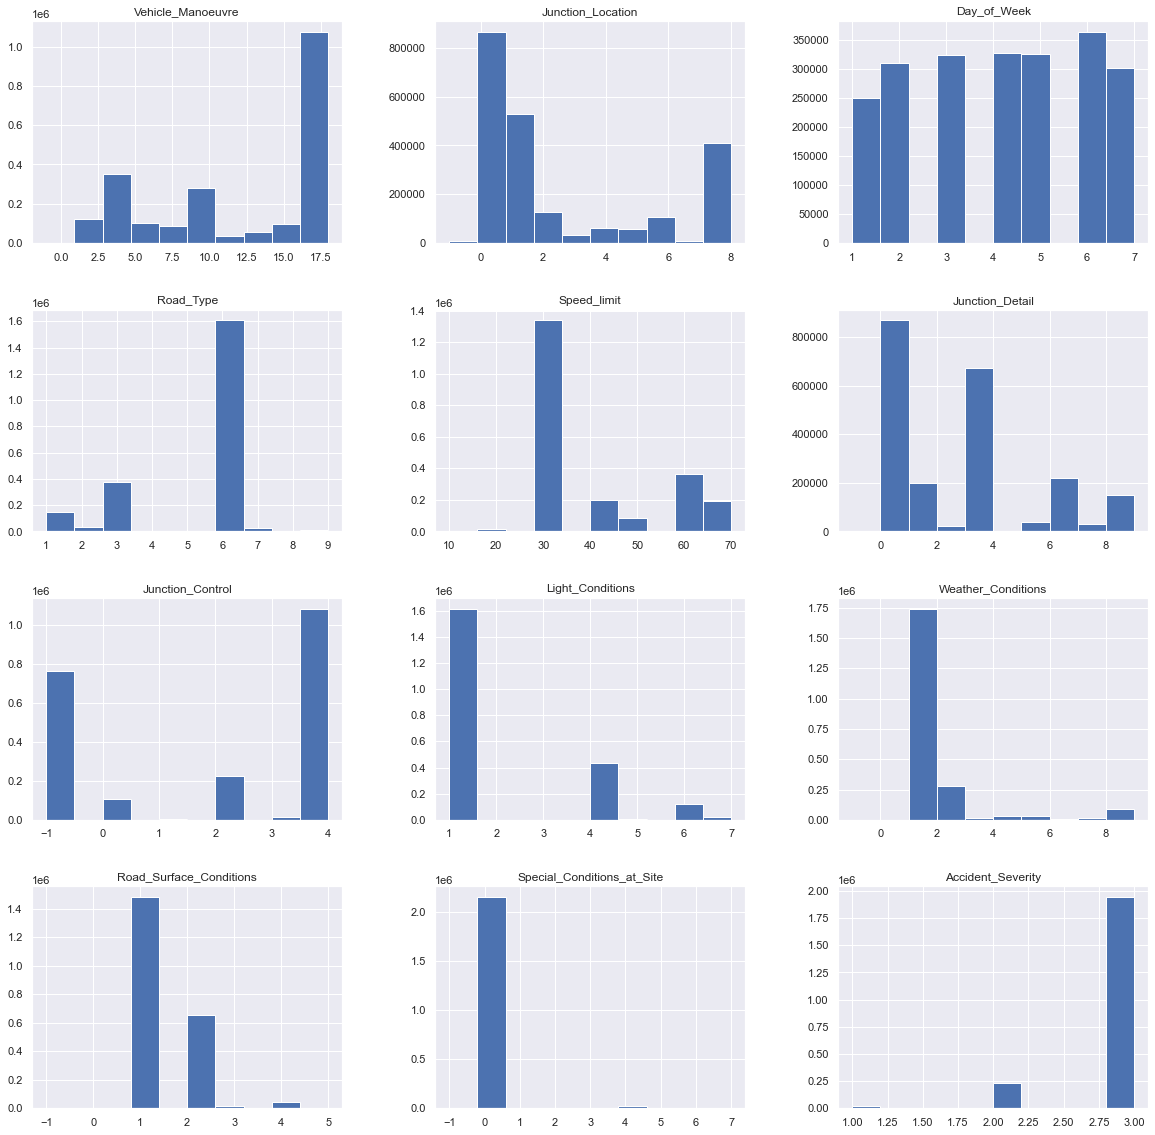

In [6]:
plt.figure()
df2.hist(figsize=(20,20));